## Example of using xarray with NASA DCP-30 datasets
This example is based on the following code: https://cloud-gc.readthedocs.io/en/stable/chapter06_appendix/plot_NASANEX.html, but uses data fetched from the Kita Lab server rather than downloaded directly from S3.
Note that the only differences from the referenced example is open_dataset call - we provide a url to the data rather than a file name.  Also it is necessary to specify engine='h5netcdf' for xarray to connect with the server.

In [2]:
# get the h5netcdf package
import sys
!{sys.executable} -m pip install h5netcdf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import h5pyd
import h5netcdf

In [4]:
# should show 0.4.2 or greater
h5pyd.version.version
xr.show_versions()  # xarray should be 0.10.8


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
python-bits: 64
OS: Linux
OS-release: 4.9.0-9-amd64
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: en_US.UTF-8
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8
libhdf5: 1.10.5
libnetcdf: 4.6.2

xarray: 0.13.0
pandas: 0.25.1
numpy: 1.17.2
scipy: 1.3.1
netCDF4: 1.5.1.2
pydap: None
h5netcdf: 0.7.4
h5py: 2.9.0
Nio: None
zarr: 2.3.2
cftime: 1.0.3.4
nc_time_axis: None
PseudoNetCDF: None
rasterio: None
cfgrib: None
iris: 2.2.0
bottleneck: None
dask: 2.2.0
distributed: 2.5.1
matplotlib: 3.1.1
cartopy: 0.17.0
seaborn: 0.9.0
numbagg: None
setuptools: 41.0.1
pip: 19.2.1
conda: 4.7.10
pytest: None
IPython: 7.8.0
sphinx: None


In [5]:
# open the dataset using xarray
# with engine='h5netcdf', xarray will use Kita Lab server to access the data
lab_url = "http://hsdshdflab.hdfgroup.org"
filename = "tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc"
filepath = "/shared/NASA/" + filename
print(lab_url + filepath)
ds = xr.open_dataset(lab_url + filepath, engine="h5netcdf")

http://hsdshdflab.hdfgroup.org/shared/NASA/tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc


In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time     (time) object 2100-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    parent_experiment:              historical
    parent_experiment_id:           historical
    parent_experiment_rip:          r1i1p1
    Conventions:                    CF-1.4
    institution:                    NASA Earth Exchange, NASA Ames Research C...
    institute_id:                   NASA-Ames
    realm:                          atmos
    modeling_realm:                 atmos
    version:                        1.0
    downscalingModel:               BCSD
    experiment_id:                  rcp85
    frequency:                      day
    realization:                    [1]
    initialization_method:        

In [7]:
# temp fix for issue noted in: https://github.com/SciTools/cartopy/issues/1120
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [8]:
# adjust the longitude axis to run from -180 to 180  (takes a while)
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)

In [9]:
%time arr = ds['tasmax'][0]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.44 ms


/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


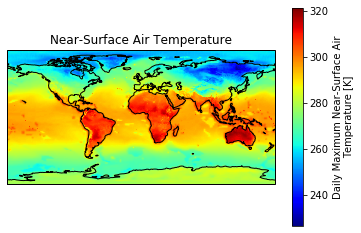

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
arr.plot(cmap='jet')
ax.coastlines()
plt.title('Near-Surface Air Temperature');

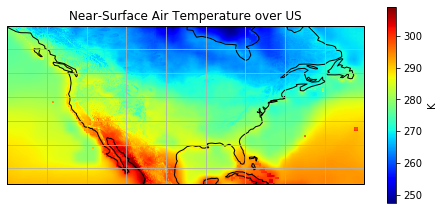

In [11]:
# Zoom into to an area around the continental US
plt.figure(figsize=[8, 6])
ax = plt.axes(projection=ccrs.PlateCarree())
(ds['tasmax'][0].
 sel(lon=slice(-140, -50), lat=slice(20, 60)).
 plot(cmap='jet', cbar_kwargs={'shrink': 0.6, 'label': 'K'})
)
ax.coastlines()
ax.gridlines()
plt.title('Near-Surface Air Temperature over US');